# <center> Домашнее задание

Используя информацию по мидиям Петербурга и Магадана, которые представлены в виде двух массивов petersburg и magadan в разделе ANOVA тест:
* проверьте данные на нормальность и на наличие корреляции. 
* Для этого объедините 2 массива в DataFrame. 
* Обоснуйте выбор теста на корреляцию. Сделайте вывод по гипотезе.
 
 
Также ответьте на вопрос:
* Kакова разница в среднем размере мидии в зависимости от города-производителя. 
* Обоснуйте выбор теста. Сделайте вывод по гипотезе.

In [13]:
# импортируем необходимые библиотеки
import pandas as pd
from scipy import stats 
import seaborn as sns

In [2]:
# зададим данные о размере устриц
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,
           0.0689]

In [4]:
# создадим DataFrame
data = pd.concat([p:=pd.Series(petersburg, name = 'petersburg'), m:=pd.Series(magadan, name='magadan')], axis=1, keys=[p.name,m.name])
data

,petersburg,magadan
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781
3,0.1016,0.0685
4,0.0968,0.0677
5,0.1064,0.0697
6,0.1050,0.0764
7,NaN,0.0689


In [7]:
# зададим уровеньь значимости
alpha = 0.05

In [8]:
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

In [10]:
from scipy.stats import shapiro

In [11]:
_, p = shapiro(data)
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=1.000
Данные распределены нормально


<AxesSubplot: >

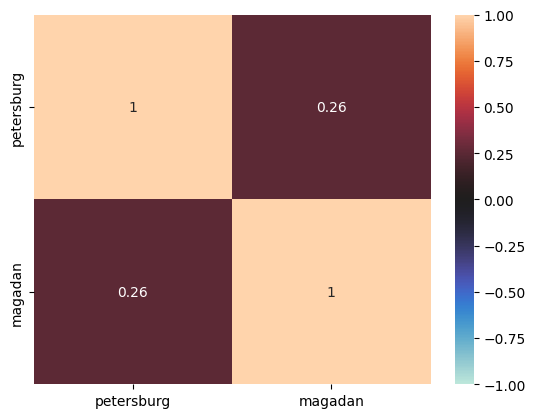

In [15]:
# определим существует ли корреляция между признаками
sns.heatmap(data=data.corr(), annot=True, vmax = 1, vmin= -1, center=0)

* Выбор проверки данных на нормальность сделан в пользу теста **Шапиро-Уилка**, так как в наших данных представленны числовые типы переменных. 
* Также данные проверены на корреляцию при помоши корреляции **Пирсона** по причине, того что данные являются числовыми а также распределены нормально.

В соотвествии с выдвинутыми гипотезами о нормальности : $H_0$ = *'Данные распределены нормально'* $H_a$ = *'Данные не распределены нормально (мы отвергаем H0)'*. Из  выдвинутых гипотез из проведенных тестов, можно сделать вывод о том, что данные распределены нормально и они независимы друг от друга 

In [19]:
# Выдвинем гипотезы для проверки разницы размера устриц от города
H0 = 'Нет значимой разницы между средним размером раковины мидий в двух разных местах.'
Ha = 'Есть значимая разница между средним размером раковины мидий в двух разных местах.'

In [17]:
from scipy.stats import f_oneway

In [20]:
if p>alpha:
  print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
else:
  print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

1.0 > 0.05. Мы не можем отвергнуть нулевую гипотезу. Нет значимой разницы между средним размером раковины мидий в двух разных местах.


Для представленных перед нами данных мы видим следующее, что данные распределены нормально,тип зависимости количественный, мы сравниваем 3 группы *(города, выборку санкт-питербург, выборку магадан)* и у нас есть одназависимая переменная размер мидии. Следовательно нам необходиом провести тест ***ANOVA***

Из проделанных тестов мы можем сделать вывод о том что гипотеза $H_0$ правдива и не существует значительной разницы между двумя разными местами их производства